In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

import warnings;
warnings.filterwarnings('ignore');

# Import DataSet:

In [3]:
data = pd.read_csv('Data (1).csv')

data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


# Exploratory Data Analysis & Pre-Processing:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [6]:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [7]:
data.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

##### We don't have any null values.

In [9]:
data.duplicated().sum()

0

##### We don't have any duplicate data(rows).

In [11]:
data['is_claim'].value_counts(normalize = True)

is_claim
0    0.936032
1    0.063968
Name: proportion, dtype: float64

##### We have class imbalance in target variable (No Claim (0) is higher then claim filed(1)).

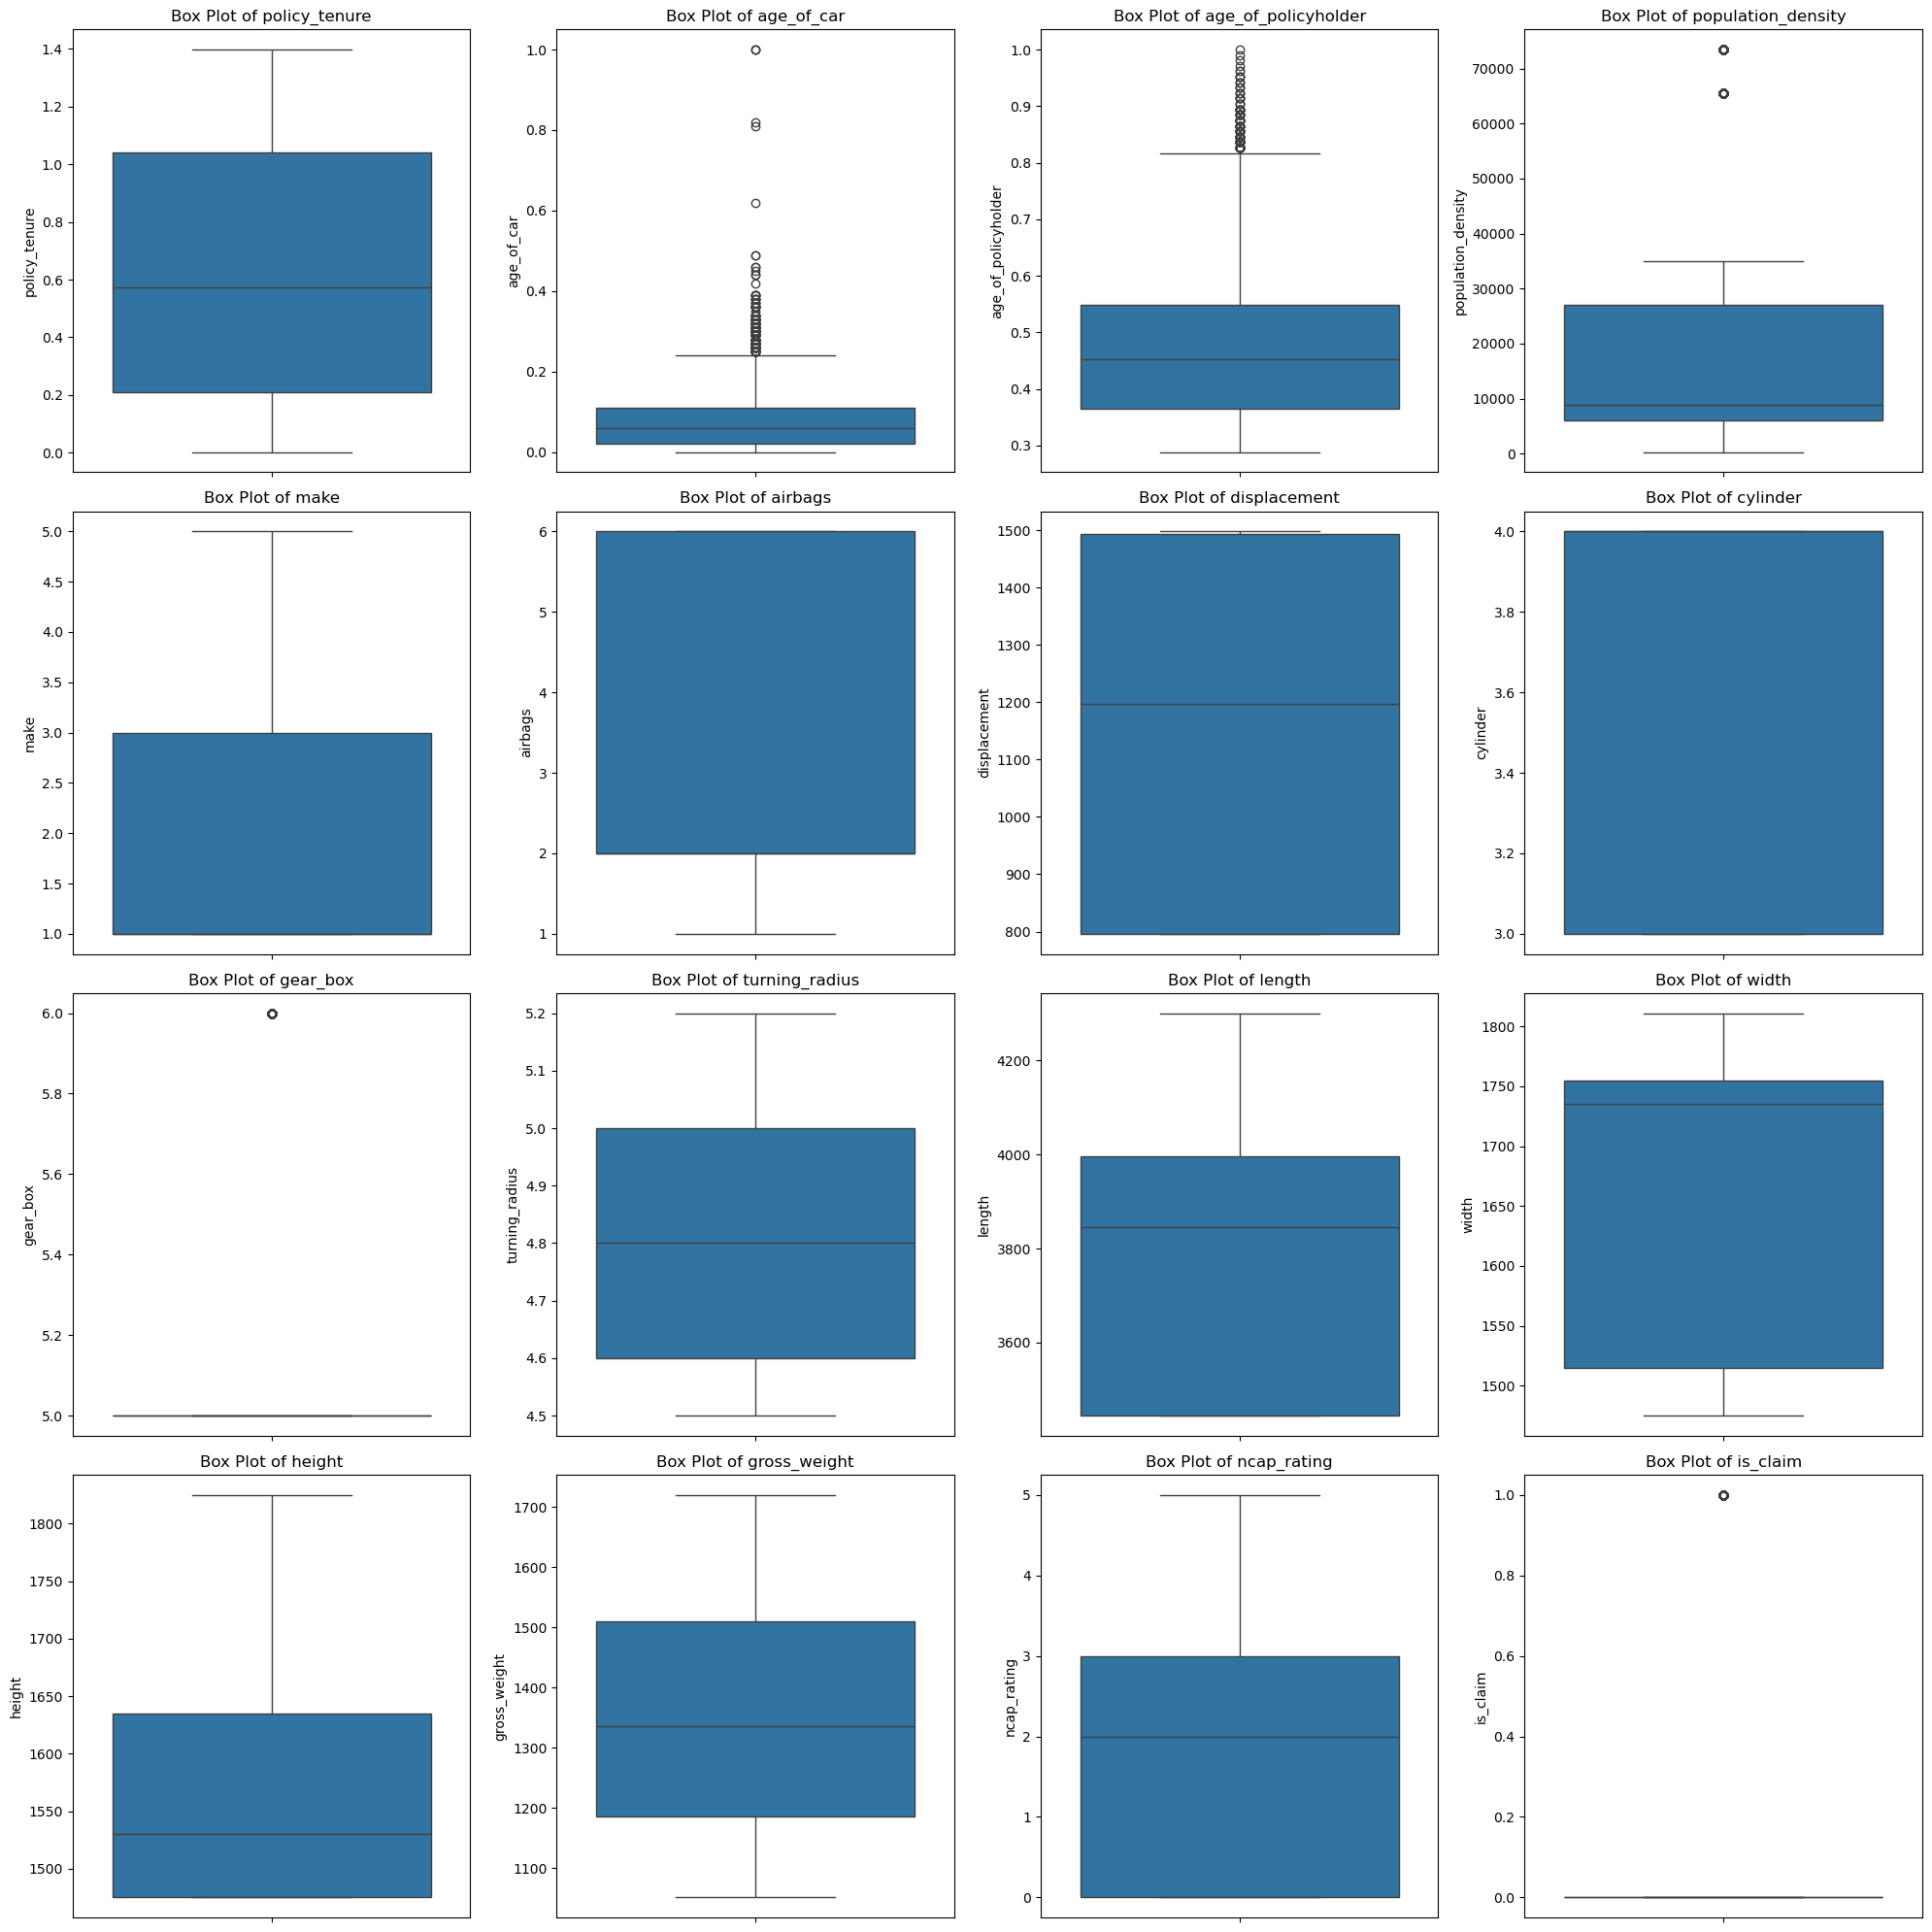

In [13]:
# Checking Outliers with the BoxPlots:

# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Iterate through the numerical columns and plot
for i, col in enumerate(numerical_cols):
    row, col_position = divmod(i, 4)  # Determine row and column position
    sns.boxplot(ax=axes[row, col_position], y=data[col])
    axes[row, col_position].set_title(f'Box Plot of {col}')
    axes[row, col_position].set_xlabel('')  # Remove x-axis label for aesthetics

# Hide any unused subplots if numerical_cols < 16
for j in range(len(numerical_cols), 16):
    row, col_position = divmod(j, 4)
    axes[row, col_position].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [14]:
# IQR Method:

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers_iqr = (data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)
outliers_iqr.sum()

policy_tenure              0
age_of_car               269
age_of_policyholder      221
population_density      3647
make                       0
airbags                    0
displacement               0
cylinder                   0
gear_box               14381
turning_radius             0
length                     0
width                      0
height                     0
gross_weight               0
ncap_rating                0
is_claim                3748
dtype: int64

##### We have 269 outliers in 'age_of_car', 221 outliers in 'age_of_policyholder', 3647 outliers in 'population_density', 14381 outliers in 'gear_box' columns

In [16]:
# Print Unique values of all columns.

for col in data:
    print(f'Unique value of {col}:',data[col].unique())

Unique value of policy_id: ['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
Unique value of policy_tenure: [0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]
Unique value of age_of_car: [0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]
Unique value of age_of_policyholder: [0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68269231 0.36538462 0.35576923
 0.50961538 0.53846154 0.67307692 0.34615385 0.54807692 0.28846154
 0.55769231 0.75961538 0.33653846 0.74038462 0.66346154 0.625
 0.52884615 0.58653846 0.

##### We will convert the values of columns 'policy_tenure' and 'age_of_policyholder' into 0.1 decimal for better readability and minimize the decimal noise.

In [18]:
data['policy_tenure'] = data['policy_tenure'].round(1)
data['age_of_policyholder'] = data['age_of_policyholder'].round(1)

print((data['policy_tenure']).unique())
print(data['age_of_policyholder'].unique())

[0.5 0.7 0.8 0.9 0.6 1.  0.1 0.3 0.  0.2 1.1 1.2 0.4 1.4 1.3]
[0.6 0.4 0.5 0.3 0.9 0.7 0.8 1. ]


In [19]:
data.head(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.5,0.05,0.6,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.7,0.02,0.4,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.8,0.02,0.4,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0


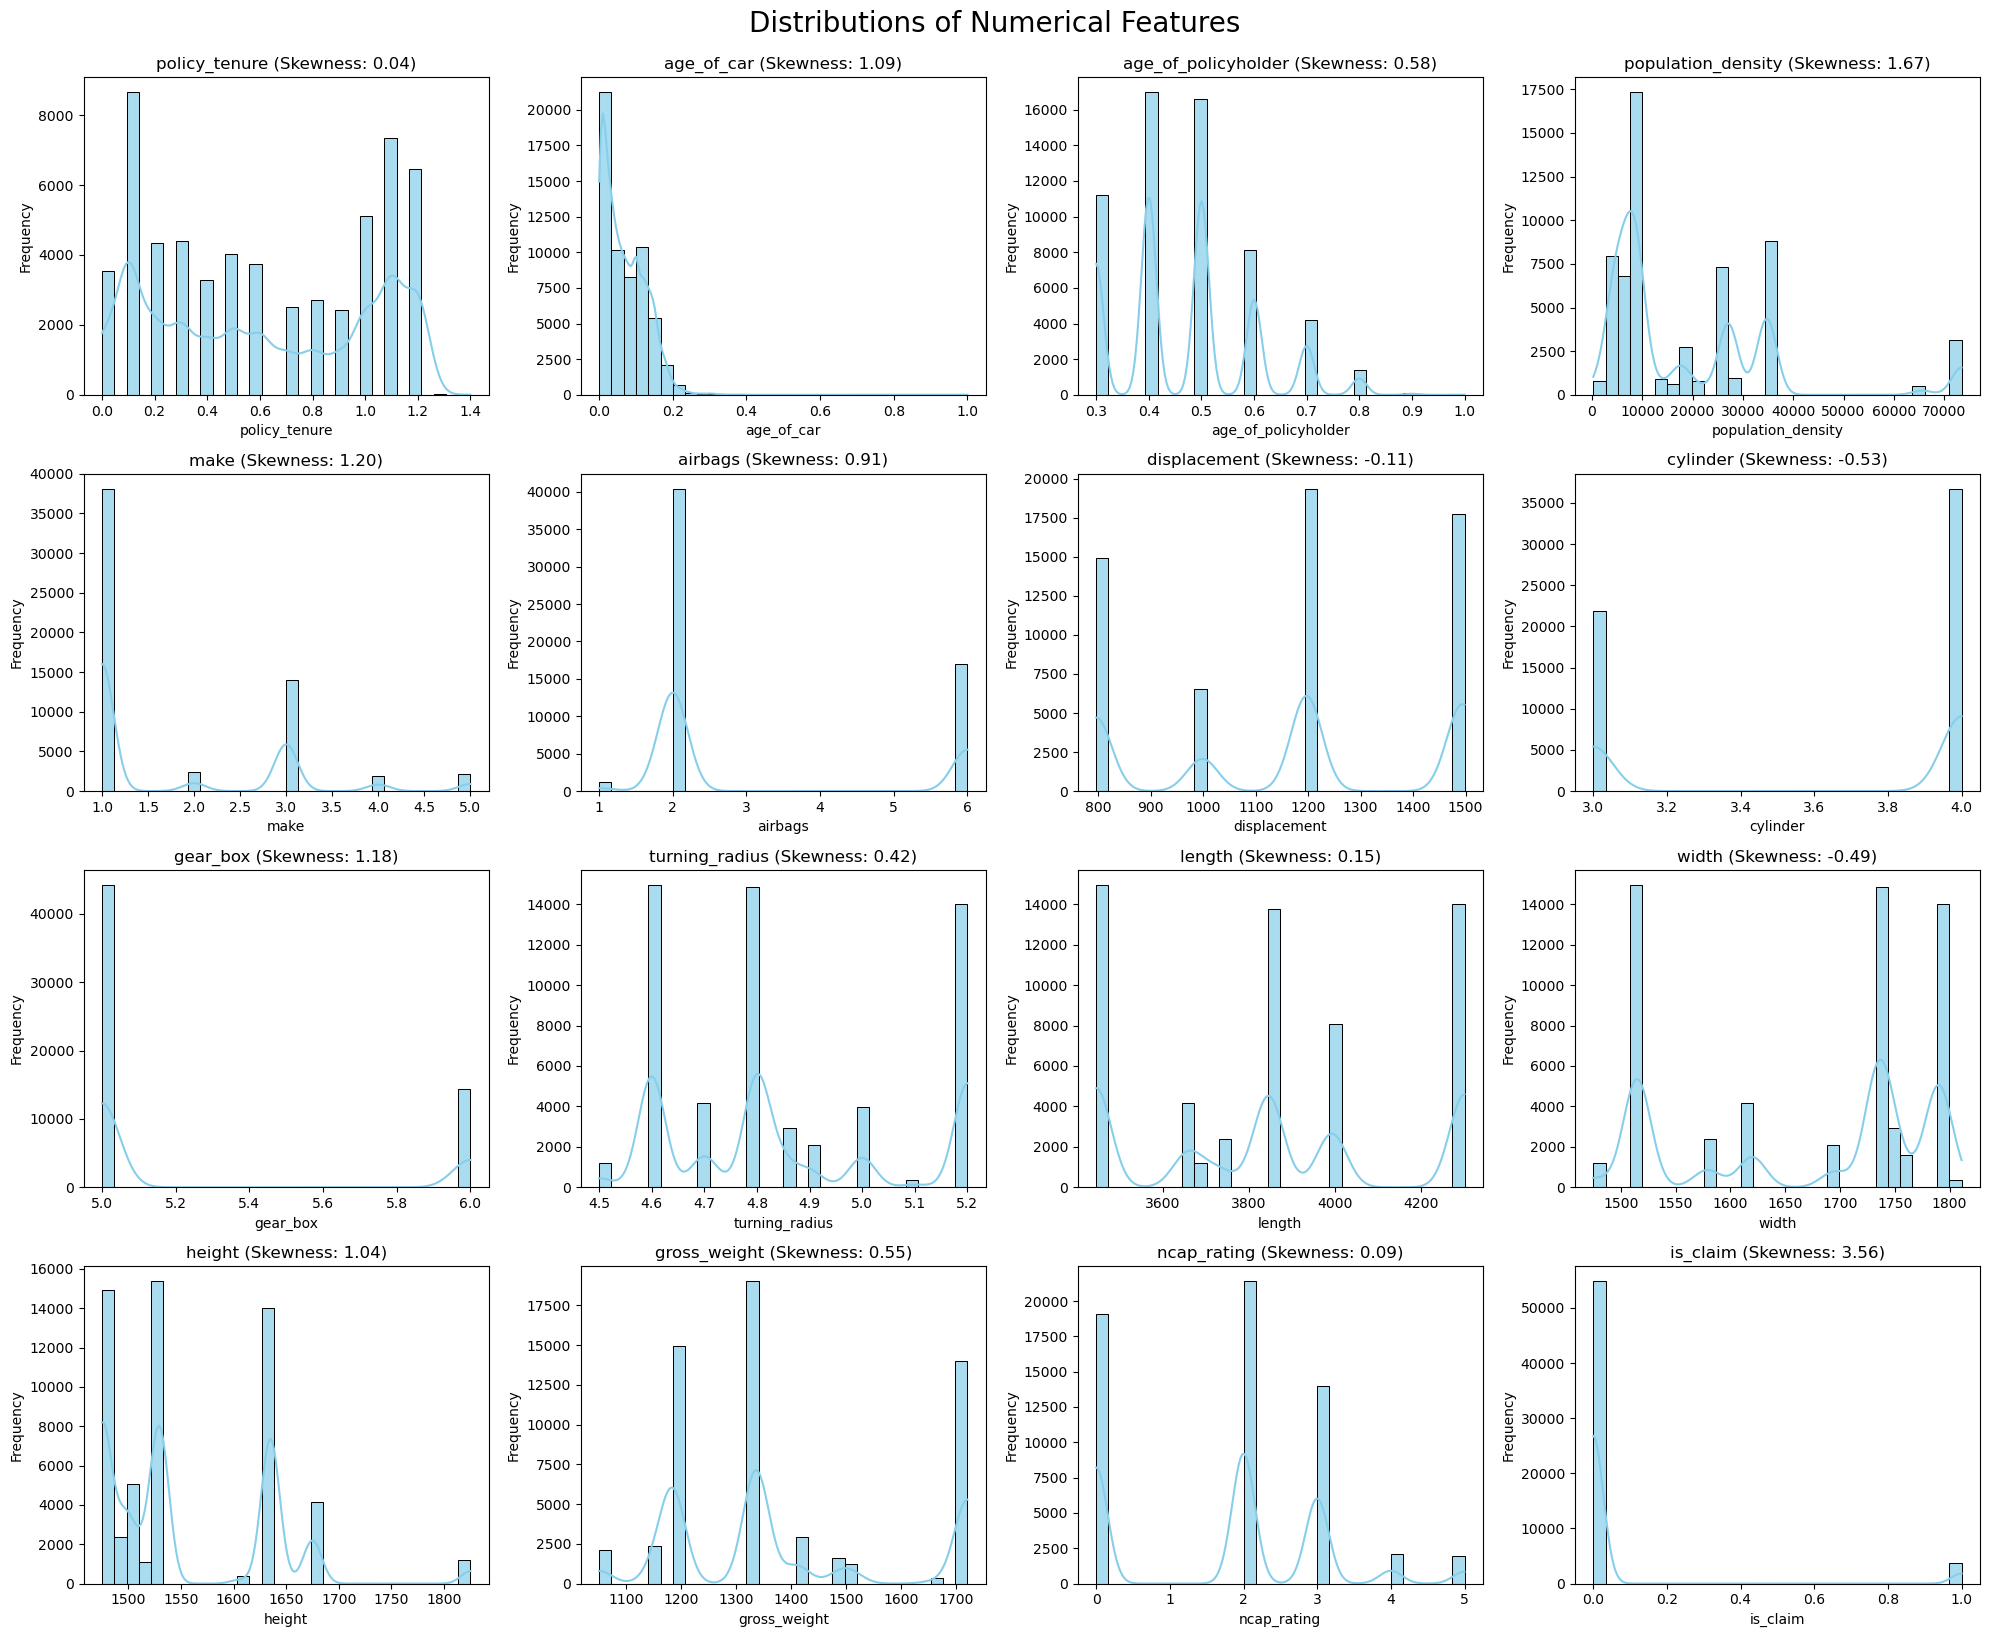

In [20]:
numerical_col = data.select_dtypes(include = ['float64', 'int64']).columns

fig, axes = plt.subplots(4, 4, figsize=(20, 16)) 

axes = axes.ravel()

for i,col in enumerate(numerical_col):
    sns.histplot(data[col], kde=True, bins=30, color='skyblue',ax = axes[i], alpha=0.7)
    
    # Add skewness text to the plot
    skewness = data[col].skew()  # Calculate skewness
    axes[i].set_title(f'{col} (Skewness: {skewness:.2f})', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', fontsize=20, y=1.02)
plt.show()


##### Handling Outliers

We identified outliers in the following columns: `age_of_car`, `age_of_policyholder`, `population_density`, and `gear_box`. 

After analyzing the distribution and skewness of the data, we found the following skewness values:
- `age_of_car`: 1.09  
- `age_of_policyholder`: 0.58 
- `population_density`: 1.67  
- `gear_box`: 1.18  

Since the data is moderately or highly skewed, we will handle these outliers by using the IQR Method.

Since 'gear_box' has only 2 unique values [5,6]. So, there's no need for outlier treatment to the 'gear_box'.

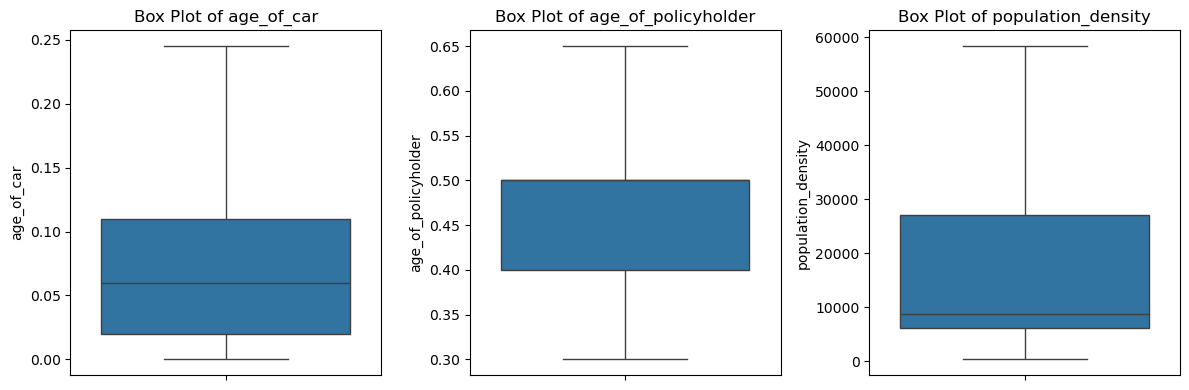

In [22]:
# Capping method to keep outliers:

columns_with_outliers = ['age_of_car','age_of_policyholder','population_density']

def cap_outliers(df,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[column] = df[column].apply(lambda x: upper_bound if x>upper_bound else (lower_bound if x< lower_bound else x))
    return df[column]

for col in columns_with_outliers:
    data[col] = cap_outliers(data, col)

fig, axes = plt.subplots(1, len(columns_with_outliers), figsize=(len(columns_with_outliers) * 4, 4))

# Iterate through the columns_with_outliers

for i, col in enumerate(columns_with_outliers):
    sns.boxplot(ax=axes[i], y=data[col])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')  # Remove x-axis label for better aesthetics
plt.tight_layout()
plt.show()

    

In [23]:
numerical_col

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [24]:
# Calculated the Pearson correlation coefficient for numerical features with the target variable to assess their relationship.

numerical_corr = data[numerical_col].corr(method = 'pearson')
numerical_corr

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.169133,0.132002,-0.096716,0.087655,0.104887,0.196723,0.193260,0.096249,0.168305,0.193017,0.215363,0.120655,0.142432,0.175541,0.078928
age_of_car,0.169133,1.000000,-0.042566,-0.062329,0.192005,0.213125,0.401098,0.387392,0.205050,0.339539,0.390831,0.422820,0.263012,0.307396,0.355948,-0.028175
age_of_policyholder,0.132002,-0.042566,1.000000,0.013411,-0.031423,-0.010556,-0.029198,-0.003334,-0.004915,-0.020428,-0.025502,-0.014054,-0.056493,-0.010950,-0.035659,0.020442
population_density,-0.096716,-0.062329,0.013411,1.000000,-0.033116,-0.061196,-0.089642,-0.091563,-0.057336,-0.076434,-0.091091,-0.097684,-0.064044,-0.078101,-0.068526,-0.016609
make,0.087655,0.192005,-0.031423,-0.033116,1.000000,0.501800,0.753344,0.410672,0.632807,0.753861,0.692365,0.511695,0.303274,0.481408,0.792254,-0.000456
airbags,0.104887,0.213125,-0.010556,-0.061196,0.501800,1.000000,0.661190,0.478594,0.859556,0.810820,0.809094,0.639562,0.423816,0.828988,0.341557,0.002789
displacement,0.196723,0.401098,-0.029198,-0.089642,0.753344,0.661190,1.000000,0.866231,0.692240,0.875407,0.961655,0.899302,0.554591,0.776210,0.847065,0.007678
cylinder,0.193260,0.387392,-0.003334,-0.091563,0.410672,0.478594,0.866231,1.000000,0.410163,0.615806,0.805476,0.862430,0.352118,0.602978,0.598364,0.013434
gear_box,0.096249,0.205050,-0.004915,-0.057336,0.632807,0.859556,0.692240,0.410163,1.000000,0.861740,0.808975,0.601923,0.579725,0.894639,0.529688,-0.000635
turning_radius,0.168305,0.339539,-0.020428,-0.076434,0.753861,0.810820,0.875407,0.615806,0.861740,1.000000,0.944899,0.825603,0.460436,0.823097,0.779302,0.002724


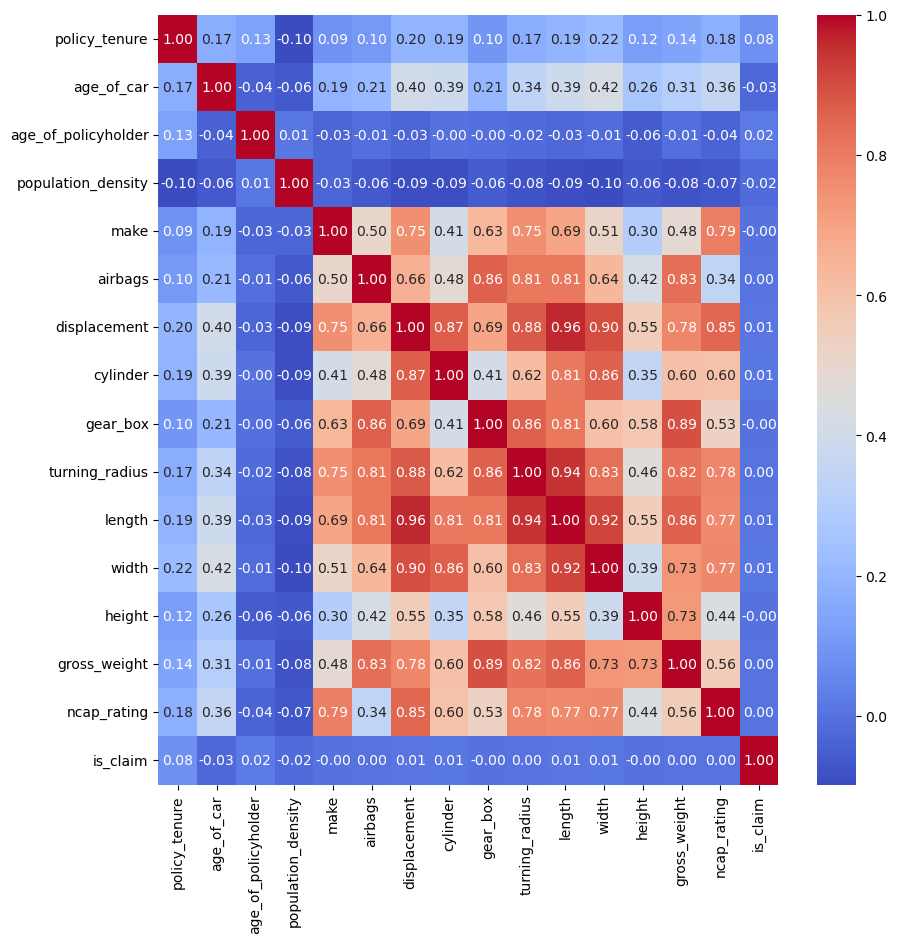

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(numerical_corr,annot = True, cmap = 'coolwarm',cbar = True, fmt = '.2f')
plt.show()

In [26]:
# These columns represent numerical values with units (e.g., Nm@rpm or bhp@rpm).so Extracting numeric components before encoding.

data['max_torque_value'] = data['max_torque'].str.extract(r'(\d+\.?\d*)').astype(float)

data['max_power_value'] = data['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)

data.drop(['max_torque','max_power'], axis=1, inplace = True)

In [27]:
# Create new features
data['volume'] = data['length'] * data['width'] * data['height']
data['density'] = data['gross_weight'] / data['volume']
data['surface_area'] = 2 * (data['length'] * data['width'] + data['width'] * data['height'] + data['height'] * data['length'])

# Drop the original features 
data = data.drop(['length', 'width', 'height', 'gross_weight'], axis=1)

In [28]:
data.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_value,max_power_value,volume,density,surface_area
0,ID00001,0.5,0.05,0.6,C1,4990.0,1,A,M1,CNG,...,No,No,Yes,0,0,60.0,40.36,7698283125,1.539304e-07,25070350
1,ID00002,0.7,0.02,0.4,C2,27003.0,1,A,M1,CNG,...,No,No,Yes,0,0,60.0,40.36,7698283125,1.539304e-07,25070350


In [29]:
cat_col = data.select_dtypes(include=['object']).columns

for col in cat_col:
    print(f'Unique value of {col}:{data[col].unique()}')

Unique value of policy_id:['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
Unique value of area_cluster:['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
Unique value of segment:['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
Unique value of model:['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
Unique value of fuel_type:['CNG' 'Petrol' 'Diesel']
Unique value of engine_type:['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
Unique value of is_esc:['No' 'Yes']
Unique value of is_adjustable_steering:['No' 'Yes']
Unique value of is_tpms:['No' 'Yes']
Unique value of is_parking_sensors:['Yes' 'No']
Unique value of is_parking_camera:['No' 'Yes']
Unique value of rear_brakes_type:['Drum' 'Disc']
Unique value of transmission_type:['Manual' 'Automatic']
Unique value

In [30]:
binary_cols = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
               'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
               'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
               'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
               'is_ecw', 'is_speed_alert']

for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})


In [31]:
# One hot encoding for categorical columns

nominal_cols = ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 
                'rear_brakes_type', 'transmission_type', 'steering_type']

data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)


In [32]:
data.head(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,...,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,ID00001,0.5,0.05,0.6,4990.0,1,2,0,0,0,...,False,True,False,False,False,False,True,True,False,True
1,ID00002,0.7,0.02,0.4,27003.0,1,2,0,0,0,...,False,True,False,False,False,False,True,True,False,True
2,ID00003,0.8,0.02,0.4,4076.0,1,2,0,0,0,...,False,True,False,False,False,False,True,True,False,True


##### Building the Model:

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [35]:
X = data.drop(columns = ['policy_id','is_claim'])
y = data['is_claim']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41014, 85)
(17578, 85)
(41014,)
(17578,)


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [39]:
print(y_train_smote.value_counts(normalize = True))

is_claim
1    0.5
0    0.5
Name: proportion, dtype: float64


In [40]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [43]:
lr = LogisticRegression(class_weight = 'balanced')

lr.fit(X_train_smote_scaled, y_train_smote)

y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75     16417
           1       0.09      0.51      0.15      1161

    accuracy                           0.61     17578
   macro avg       0.52      0.57      0.45     17578
weighted avg       0.89      0.61      0.71     17578

[[10213  6204]
 [  568   593]]


### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [47]:
rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42, n_estimators = 100)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     16417
           1       0.08      0.05      0.06      1161

    accuracy                           0.90     17578
   macro avg       0.51      0.50      0.50     17578
weighted avg       0.88      0.90      0.89     17578



In [51]:
print(confusion_matrix(y_test, y_pred))

[[15695   722]
 [ 1099    62]]


### Random Forest Classifier with HyperParametr tuning

In [53]:
params_list = [
    {'n_estimators': 100, 'max_depth': 10, 'class_weight': 'balanced'},
    {'n_estimators': 150, 'max_depth': None, 'class_weight': 'balanced'},
    {'n_estimators': 50, 'max_depth': 20, 'class_weight': 'balanced_subsample'},
]

for params in params_list:
    rf = RandomForestClassifier(**params, random_state=42)
    rf.fit(X_train_smote, y_train_smote)
    y_pred = rf.predict(X_test)
    print(f"Params: {params}, F1-Score: {f1_score(y_test, y_pred)}")

Params: {'n_estimators': 100, 'max_depth': 10, 'class_weight': 'balanced'}, F1-Score: 0.1497289972899729
Params: {'n_estimators': 150, 'max_depth': None, 'class_weight': 'balanced'}, F1-Score: 0.06414899120538024
Params: {'n_estimators': 50, 'max_depth': 20, 'class_weight': 'balanced_subsample'}, F1-Score: 0.10583657587548638


In [54]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [80, 100, 120],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    scoring='f1',
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_smote, y_train_smote)
print("Best Parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 120, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 12, 'class_weight': 'balanced'}
Best F1-Score: 0.8493844417306885


In [57]:
best_rf = RandomForestClassifier(
    n_estimators=120,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=12,
    class_weight='balanced',
    random_state=42
)

best_rf.fit(X_train_smote, y_train_smote)
y_pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12588  3829]
 [  752   409]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     16417
           1       0.10      0.35      0.15      1161

    accuracy                           0.74     17578
   macro avg       0.52      0.56      0.50     17578
weighted avg       0.89      0.74      0.80     17578



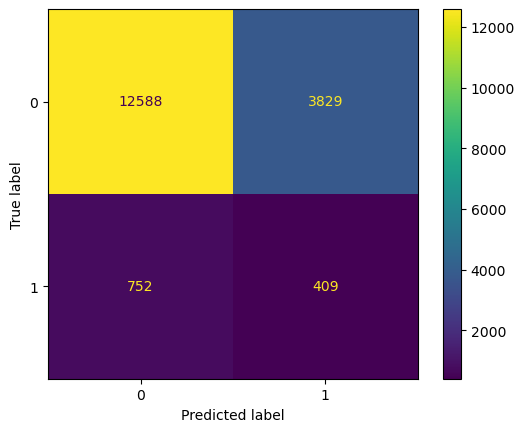

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)

In [61]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head())

                Feature  Importance
0         policy_tenure    0.323843
2   age_of_policyholder    0.289211
1            age_of_car    0.192718
3    population_density    0.047913
35     area_cluster_C12    0.011034


### RandomForest Classifier with best features

In [63]:
selected_features = ['policy_tenure', 'age_of_policyholder', 'age_of_car', 'population_density', 'area_cluster_C12']
X_selected = data[selected_features]
y_selected = data['is_claim']


In [65]:
X_selected.fillna(X_selected.median(), inplace=True)  # Replace NaNs with median values


In [67]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected,stratify = y_selected, test_size=0.2, random_state=42)

In [69]:
# Initialize and train the model
rf2 = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=120, max_depth=12)
rf2.fit(X_train_selected, y_train_selected)

# Predict on test data
y_pred = rf2.predict(X_test_selected)

# Evaluate the model
print(confusion_matrix(y_test_selected, y_pred))
print(classification_report(y_test_selected, y_pred))


[[7798 3171]
 [ 440  310]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     10969
           1       0.09      0.41      0.15       750

    accuracy                           0.69     11719
   macro avg       0.52      0.56      0.48     11719
weighted avg       0.89      0.69      0.77     11719



### Stacking Classifier (RandomForest + Logistic Regression)

In [71]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacked_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=120, max_depth=12, random_state=42)),
        ('lr', LogisticRegression(class_weight='balanced'))
    ],
    final_estimator=LogisticRegression()
)

stacked_model.fit(X_train_smote, y_train_smote)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=12,
                                                       n_estimators=120,
                                                       random_state=42)),
                               ('lr',
                                LogisticRegression(class_weight='balanced'))],
                   final_estimator=LogisticRegression())

In [73]:
y_pred = stacked_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     16417
           1       0.10      0.29      0.14      1161

    accuracy                           0.78     17578
   macro avg       0.52      0.55      0.51     17578
weighted avg       0.89      0.78      0.82     17578

[[13298  3119]
 [  827   334]]


### XGBoost Classifier

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Initialize XGBoost classifier
xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight=14.63,  # Adjust as per class imbalance
    max_depth=10,           # Example value
    learning_rate=0.1,      # Example value
    n_estimators=100        # Example value
)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.72      0.82     16417
           1       0.10      0.42      0.16      1161

    accuracy                           0.70     17578
   macro avg       0.52      0.57      0.49     17578
weighted avg       0.89      0.70      0.78     17578

[[11891  4526]
 [  669   492]]


### XGBoost Classifer with hyperparameter tuning

In [77]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, 5, 10, 20]  # Adjust for class imbalance
}

In [79]:
xgb1 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [81]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb1,
    param_distributions=param_grid,
    n_iter=20,  # Number of random configurations to try
    scoring='f1',  # Focus on F1-score for the minority class
    cv=2,         # 2-fold cross-validation
    verbose=2,
    n_jobs=-1,    # Use all available cores
    random_state=42
)

# Fit the model
random_search.fit(X_train_smote, y_train_smote)

# Best parameters and F1-score
print("Best Parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best F1-Score: 0.945069022963705


In [83]:
# Train the model with best parameters
best_xgb = random_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Performance metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16219   198]
 [ 1142    19]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16417
           1       0.09      0.02      0.03      1161

    accuracy                           0.92     17578
   macro avg       0.51      0.50      0.49     17578
weighted avg       0.88      0.92      0.90     17578



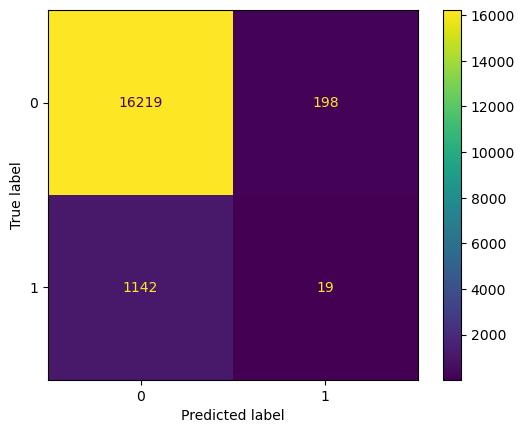

In [84]:
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test)

In [85]:
results = {
    "Model": ["Logistic Regression", "Random Forest (tuned)", "XGBoost", "XGBoost (tuned)"],
    "Accuracy": [0.61, 0.74, 0.70,0.74],
    "Precision (Class 1)": [0.09, 0.10, 0.10,0.10],
    "Recall (Class 1)": [0.51, 0.35, 0.42,0.35],
    "F1-Score (Class 1)": [0.15, 0.15, 0.16,0.15],
}
results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Logistic Regression,0.61,0.09,0.51,0.15
1,Random Forest (tuned),0.74,0.10,0.35,0.15
2,XGBoost,0.70,0.10,0.42,0.16
3,XGBoost (tuned),0.74,0.10,0.35,0.15


# Conclusion
The Random Forest Classifier with hyperparameter tuning and XGBoost Classifier were identified as the best-performing models based on the balance between precision, recall, and F1-Score for the minority class (claims). While XGBoost achieved the highest accuracy, Random Forest provided a better trade-off between recall and precision. These models can help insurance companies assess claim probabilities and set premiums effectively.
